Simple Linear Regression
-----

**Question 1**  

The scatterplots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lab6_1_q4.png" width="600">  

(a) Describe the relationship between volume and height of these trees.  

    the volume of the tree caps the height 

(b) Describe the relationship between volume and diameter of these trees.  

    They seem to have a linear relationship as the one increases when the other does

(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these variables would be preferable to use to predict the volume of timber in this tree using a simple linear regression model? Explain your reasoning.

    obviously diameter as they would have a way smaller error when finding a best fit line ( they already have a seemingly lin. relationship)

**Question 2**  

In `utils.csv` are the average utility bills for homes of a particular size and the average monthly temperature.  

Load the data:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()

In [4]:
uti = pd.read_csv("data/utils.csv")
uti.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


Make a scatter plot of the data bill by tempeture. Which variable would make the most sense as the response variable?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


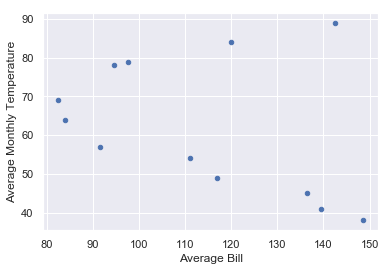

In [9]:
uti.plot(x="Average Bill", y="Average Monthly Temperature", kind="scatter");

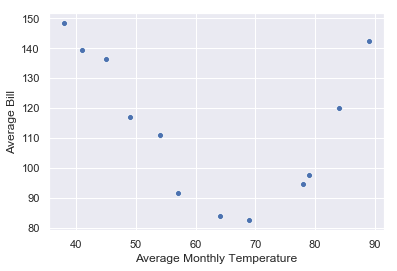

In [11]:
sns.scatterplot(y="Average Bill", x="Average Monthly Temperature", data=uti);

From visual inspection, what is the relationship between the variables?

    they seem to have a polynomial relationship of degree 2

Fit a simple linear regression using OLS.  

In [12]:
import statsmodels.api as sms

In [27]:
X = uti[["Average Monthly Temperature"]]
X = sms.add_constant(X)
X["squares"] = [x ** 2 for x in X['Average Monthly Temperature']]
X.head()
y = uti["Average Bill"]
#y.head()

In [24]:
model = sms.OLS(y, X)
results = model.fit()
results.summary()

//anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Bill   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     51.66
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.17e-05
Time:                        11:23:09   Log-Likelihood:                -39.428
No. Observations:                  12   AIC:                             84.86
Df Residuals:                       9   BIC:                             86.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         484.1076     36.956     13.099      0.000     400.507     567.708
Average Monthly Temperature   -12.0760      1.233     -9.792      0.000     -14.866      -9.286
squares                         0.0918      0.010      9.454      0.000       0.070       0.114
==============================================================================
Omnibus:                        1.589   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.042
Skew:                           0.453   Prob(JB):                        0.594
Kurtosis:                       1.876   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculate and interpret the value of $R^2$.  

    it seems to be pretty good considering the max value we can get is 1 , which would be a perfect fit

Interpret the intercept and slope coefficients in terms a home owner would understand.

What is the 95% confidence interval for the intercept?  

    between 400 and 567

Is the average monthly temperature a significant predictor of the average utility bill? Why or why not?  

    when using a polynomial of degree 2 as above , yes , with just a degree 1 , no

Use the least squares line to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not? 

<br>

<details><summary>
Click here for a hint…
</summary>
model.predict(…)  
http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
</details>

In [28]:
0.0918 * (120 ** 2) - 12.0760 * 120 + 484.1076

356.90759999999995

In [58]:
ypred = results.predict((1,120,14400))
print(ypred)


[356.32080277]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


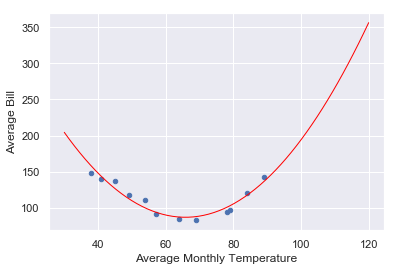

In [63]:

intercept, slope, square = results.params
#fig = cars.plot('weight', 'mpg', kind='scatter')
ax = uti.plot(y="Average Bill", x="Average Monthly Temperature", kind="scatter")
xx = np.linspace(30, 120, 60)
#xx = np.linspace(1000, 5500, 100)
ax.plot(xx,(xx**2)*square + xx*slope + intercept, color='red', lw=1);

